# Glass identification using KNN model

Here we have multivariate data set with various attributes/features of glass, based on which i have used KNN model to classify the glass TYPE(Target Variable).


# Import all the necessary module

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [531]:
glass=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv')
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Attribute Information:



1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [532]:
glass[glass['K']>3]['Type'].unique()

array([5], dtype=int64)

# How many glasses of each type present ?

   glassTypes  counts
0           2      76
1           1      70
2           7      29
3           3      17
4           5      13
5           6       9


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000219FB437710>,
      dtype=object)

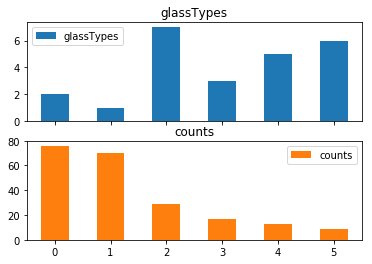

In [533]:
glass_t=glass['Type'].value_counts().reset_index()

glass_t.columns=['glassTypes','counts']

print(glass_t)
glass_t.plot.bar(rot=0,subplots=True)


check the shape of data set

In [534]:
glass.shape

(214, 10)

info of data set

In [535]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


check the descriptive statistics of data set

In [536]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Count each glasstypes and plot a bar chart

In [537]:
glassType=glass['Type'].groupby(glass['Type']).count()

Text(0.5, 1.0, 'glasstype vs count')

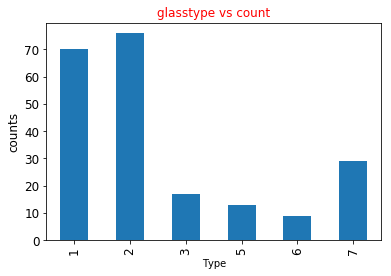

In [538]:
glassType.plot('bar', fontsize=12)
plt.ylabel('counts',fontsize=12)
plt.title('glasstype vs count', fontsize=12, color='red')

see the distribution of Type 

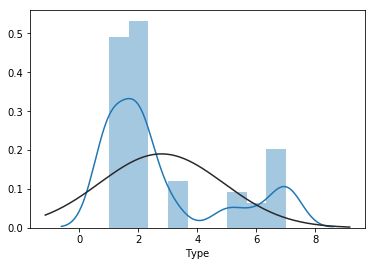

In [539]:
import seaborn as sns
from scipy import stats 
sns.distplot(glass['Type'],fit=stats.norm)

# plot the scatter plot by species

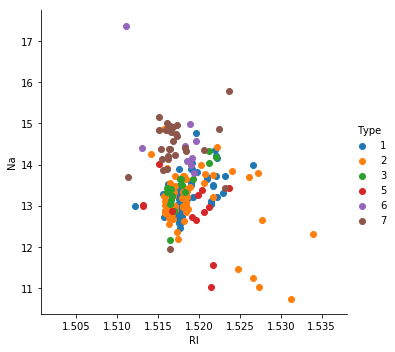

In [540]:
sns.FacetGrid(glass, hue='Type', height=5).map(plt.scatter,'RI','Na').add_legend()

From the above scatter plot we can see that all the types are not separable

# plot Andrews curve

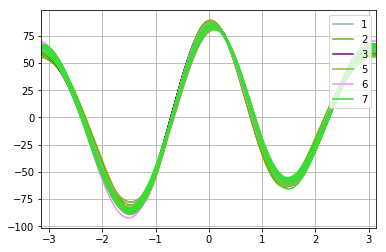

In [541]:
from pandas.plotting import andrews_curves
andrews_curves(glass,'Type')

andrews_curves allows one to plot multivariate data as large number of curves that are created using
the attributes of samples as coefficients for fourier series. By coloring these curves differently for each class it
is possible to visualize data clustering. Curves belonging to same class will usually be closer together
and form large structures.

# plotting parallel coordinates

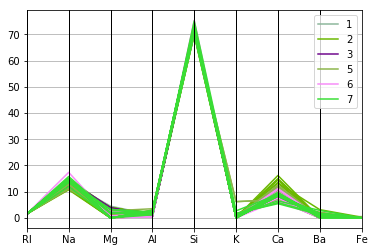

In [542]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(glass, 'Type')

parallel coordinates plots each features on separate column and then draws lines connecting the features 
for each data sample 

# ploting radviz

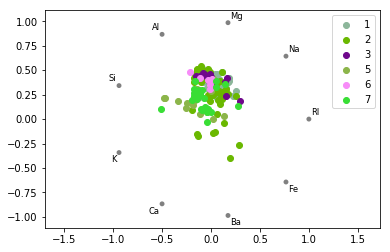

In [543]:
from pandas.plotting import radviz
radviz(glass,'Type')

radviz puts each features as a point on a 2D plane and then simulates. having each sample attached to those points
through a spring weighted by the relative value for that feature

From the above plots it is clear that features are not separable so it is a big challenge to apply 
any classification model on this data set. Hence to get a better accuracy we must get more/better data set

# Model application

# Extract the target variable from data set

In [544]:
label=glass.iloc[:,glass.columns=='Type']
label

data=glass.iloc[:,glass.columns!='Type']
data


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


# Split data in to train and test

In [545]:
from sklearn.model_selection import train_test_split

data_train,data_test, label_train, label_test=train_test_split(data,label,test_size=0.20, random_state=42)

In [546]:
data_train.head()
data_test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00


# Standardize the dataset

In [547]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

sc.fit(data_train)

data_train=sc.transform(data_train)
data_test=sc.transform(data_test)


In [548]:
pd.DataFrame(data=data_train).skew()


0    1.779708
1   -0.017104
2   -1.327392
3    0.976126
4   -0.893986
5    6.703795
6    2.086646
7    3.522884
8    1.721814
dtype: float64

In [549]:
print('there are {} samples in train dataset and {} samples in test dataset'
      .format( data_train.shape[0],data_test.shape[0]))

there are 171 samples in train dataset and 43 samples in test dataset


# Modelling and predictions

In [550]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3,p=2, metric='minkowski',n_jobs=-1)

# fit the model

In [551]:
knn.fit(data_train, label_train)

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [552]:
label_train.values.ravel().shape

(171,)

In [553]:
y_preds=knn.predict(data_test)
y_preds

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 7, 5, 1, 1, 2, 1, 7, 1],
      dtype=int64)

# implement KNN model

In [554]:
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(label_test,y_preds)
knn_accuracy
print('KNN accuracy with K=3 is :', knn_accuracy)

KNN accuracy with K=3 is : 0.813953488372093


# plot and find the best suitable value of K

In [555]:
list_accuracy=[]
def generate():
    
    for k in range(1,12):
        knn_model_=KNeighborsClassifier(n_neighbors=k)
        knn_model_.fit(data_train,label_train)
        pred_i=knn_model_.predict(data_test)
        list_accuracy.append(accuracy_score(label_test,pred_i))
        
    
generate()        

C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ab68523\annaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversion

In [556]:
maxaccuracy=max(list_accuracy)
maxaccuracyIndex=list_accuracy.index(maxaccuracy)
print('the value of K {} for the max accuracy is {}'.format(maxaccuracyIndex+1, maxaccuracy))

the value of K 3 for the max accuracy is 0.813953488372093


# plot the accuracy model for various value of K

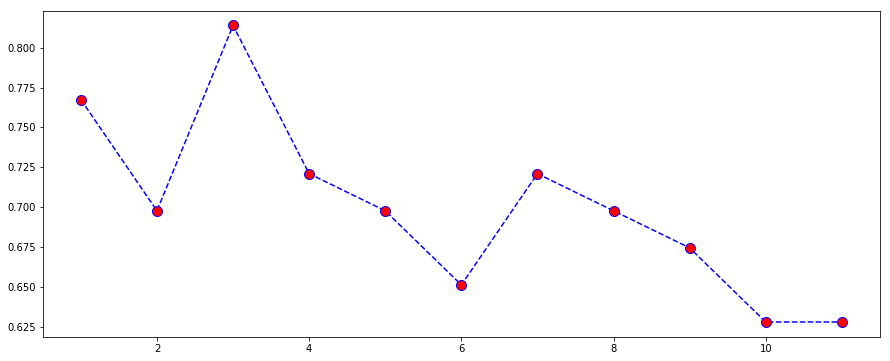

In [557]:
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,12),list_accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
generate()        

# implement logistic Regression

In [558]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()


In [559]:
logreg.fit(data_train,label_train)

C:\Users\ab68523\annaconda\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [560]:
y_pred1=logreg.predict(data_test)


In [561]:
logreg_accuracy=accuracy_score(label_test,y_pred1)
print('Logistic Regression accuracy is :', logreg_accuracy)

Logistic Regression accuracy is : 0.7209302325581395


# model comparison using accuracy

In [562]:
models=pd.DataFrame({
              'ModelName':['Knn_model3','LogisticRegression'],
              'accuracy':[maxaccuracy,logreg_accuracy]})
models.sort_values(by='accuracy')


,ModelName,accuracy
1,LogisticRegression,0.720930
0,Knn_model3,0.813953


# Conclusion

Hence KNN_model with k=3 is more accurate model to predict the glass type